DI 501 TERM PROJECT- 
EZGİ BAKIR-2740504

Dataset Description

The dataset we were asked to analyse in this project work was the Fire Response Statistics data from İzmir Büyükşehir Belediyesi. Among the data for 2023 and 2025, I chosed the 2023 data for this analysis. To simplify my literature review and coding work, I manually updated the column names in the Excel file from Turkish to English.The features, column names, and their descriptions in the dataset can be observed in the table below:

| Column Name             | Description |
|-------------------------|--------------------------------------------------------------|
| `date`                  |Exact date of fire incident in 2023|
| `fire_type`             |Description of burned location (building, workplace, vehicle, etc.)- High-cardinality categorical data|
| `fire_cause`            |Cause of fire (cigarette, electrical short circuit, arson, etc.) - High-cardinality categorical data|
| `fire_outcome`          |Fire outcome (Extinguished at beginning, Partially burned/saved, Completely burned) - 3-category classification|
| `structure_type`        |Structure type (reinforced concrete, steel, masonry, etc.)multiclass categorical data|
| `male_deaths`           |Number of male fatalities|
| `female_deaths`         |Number of female fatalities|
| `firefighter_deaths`    |Number of firefighter fatalities|
| `male_injured`          |Number of male injured person|
| `female_injured`        |Number of female injured person|
| `firefighter_injured`   |Number of injured firefighters |
| `large_livestock_deaths`|Number of large livestock deaths|
| `small_livestock_deaths`|Number of small livestock deaths|
| `poultry_deaths`        |Number of poultry deaths|
| `pet_deaths`            |Number of pet deaths|
| `other_animal`          |Number of other animal deaths|
| `arrival_time_minute`   |Fire department response time (minutes)|
| `foam_used_kg`          |Amount of foam used (kg)|
| `water_used_m3`         |Amount of water used (m³) |
| `dry_chemical_powder_used_kg`|Amount of dry chemical powder used (kg)|
| `team_departure_time`        |Team dispatch time (HH:MM format)|
| `district`                   |District name where the fire occured|
| `address_region`             |Location zone (urban center vs. rural area)|

In [14]:
# Necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

PART 1- DATA PROFILING and PREPROCESSING

In [15]:
data=pd.read_excel(r"C:\Users\ezgy_\OneDrive\Desktop\ODTÜ Enformatik\2024-2025 Bahar-1.Dönem\DI 501-Introduction to Data Informatics\Term Project\2023-yili-yangin-mudahale-istatistigi.xlsx")
data.head(10)

,date,fire_type,fire_cause,fire_outcome,structure_type,male_deaths,female_deaths,firefighter_deaths,male_injured,female_injured,...,poultry_deaths,pet_deaths,other_animal,arrival_time_minute,foam_used_kg,water_used_m3,dry_chemical_powder_used_kg,team_departure_time,district,address_region
0,2023-01-01,BİNA,KIVILCIM(BACA),BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0,0,0,4.0,0.0,1.0,0.0,00:18,KARABAĞLAR,KENT MERKEZİ
1,2023-01-01,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,0,0,0,3.0,0.0,0.5,0.0,01:38,KONAK,KENT MERKEZİ
2,2023-01-01,BİNA,ŞÜPHELİ,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0,0,0,2.0,0.0,0.0,0.0,01:50,KONAK,KENT MERKEZİ
3,2023-01-01,ARAÇ,KAZA SONUCU,KISMEN YANARAK KURTARILAN,NaN,0,0,0,0,0,...,0,0,0,4.0,0.0,2.0,0.0,02:02,BORNOVA,KENT MERKEZİ
4,2023-01-01,ARAÇ,İHMAL/DİKKATSİZLİK,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,2,0,...,0,0,0,6.0,0.0,0.4,0.0,02:24,URLA,KENT MERKEZİ
5,2023-01-01,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,0,0,0,3.0,0.0,1.5,0.0,08:14,KONAK,KENT MERKEZİ
6,2023-01-01,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,0,0,0,8.0,0.0,1.0,0.0,10:17,TORBALI,KIRSAL BÖLGE
7,2023-01-01,BİNA,ELEKT. KISA DEV./ELEKT. KONTAĞI,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0,0,0,4.0,0.0,0.0,0.0,11:27,ÇİĞLİ,KENT MERKEZİ
8,2023-01-01,ÇÖP,AÇIK ATEŞ,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,0,0,0,9.0,0.0,0.5,0.0,11:31,SEFERİHİSAR,KIRSAL BÖLGE
9,2023-01-01,BİNA,İHMAL/DİKKATSİZLİK,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,1,0,0,0,...,0,0,0,3.0,0.0,0.0,0.0,12:21,KINIK,KENT MERKEZİ


In [16]:
data.shape

(12986, 23)

The dataset appears to be very large, which could make machine learning models too slow to run. If that happens, I can train the models on a sample instead. First, let's preprocess the data with a few steps, then we can proceed with the analysis. 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         12986 non-null  datetime64[ns]
 1   fire_type                    12986 non-null  object        
 2   fire_cause                   12986 non-null  object        
 3   fire_outcome                 12986 non-null  object        
 4   structure_type               3116 non-null   object        
 5   male_deaths                  12986 non-null  int64         
 6   female_deaths                12986 non-null  int64         
 7   firefighter_deaths           12986 non-null  int64         
 8   male_injured                 12986 non-null  int64         
 9   female_injured               12986 non-null  int64         
 10  firefighter_injured          12986 non-null  int64         
 11  large_livestock_deaths       12986 non-nu

Here two things drew my attention at first: arrival_time_minute and team_departure_time were objects (strings), even though arrival_time_minute should be numeric and team_departure_time should be datetime/time type. Both of my research questions involve arrival_time_minute parameter so I needed to change the type of it but team_departure_time could stay same because I do not need any time-based calculations with machine learning models.  

In [18]:
# Convert to numeric 
data['arrival_time_minute'] = pd.to_numeric(data['arrival_time_minute'], errors='coerce')

print(data['arrival_time_minute'].dtype)
print("Missing values:", data['arrival_time_minute'].isna().sum())

float64
Missing values: 11


Later, I ran the above code to change the data type of arrival_time_minute. It showed 618 missing values before (now it is 11), which seemed very unusual. When I checked the data on excel, I noticed that some entries used the format 00:05 to represent 5 minutes. Instead of fixing this with complex Python codes, I simply replaced all "00:" with "0" in Excel, which solved the problem easily. When I ran data.info() code again, I saw that the data type was corrected as float.  Now I have to deal with the remaining 11 real missing values. Before, I should check if there is any other missing values in the other features. 

In [19]:
missing_values = data.isnull().sum()
print (missing_values)

date                              0
fire_type                         0
fire_cause                        0
fire_outcome                      0
structure_type                 9870
male_deaths                       0
female_deaths                     0
firefighter_deaths                0
male_injured                      0
female_injured                    0
firefighter_injured               0
large_livestock_deaths            0
small_livestock_deaths            0
poultry_deaths                    0
pet_deaths                        0
other_animal                      0
arrival_time_minute              11
foam_used_kg                      0
water_used_m3                     3
dry_chemical_powder_used_kg       0
team_departure_time               0
district                          0
address_region                    0
dtype: int64


We can ignore the 9870 missing values in the structure_type column because I won’t need them in any of my analysis. For the 11 missing values in arrival_time_minute and the 3 in water_used_kg, let’s fill them with their respective medians. I filled them with the median values to preserve central tendency without skewing the data.

In [20]:
data['arrival_time_minute'].fillna(data['arrival_time_minute'].median(), inplace=True)
data['water_used_m3'].fillna(data['water_used_m3'].median(), inplace=True)

print("Remaining missing values:")
print("- arrival_time_minute:", data['arrival_time_minute'].isna().sum())
print("- water_used_m3:", data['water_used_m3'].isna().sum())

Remaining missing values:
- arrival_time_minute: 0
- water_used_m3: 0


C:\Users\ezgy_\AppData\Local\Temp\ipykernel_11612\849624304.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['arrival_time_minute'].fillna(data['arrival_time_minute'].median(), inplace=True)
C:\Users\ezgy_\AppData\Local\Temp\ipykernel_11612\849624304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

Let's check if data set have any duplicate values as well.

In [21]:
duplicates = data.duplicated().sum()
print("Number of duplicates is: ", duplicates)

Number of duplicates is:  1


In [22]:
# Let's remove this one value and check again. 
data.drop_duplicates(inplace=True)
duplicates = data.duplicated().sum()
print("Number of duplicates is: ", duplicates)

Number of duplicates is:  0


Encoding the categorical values

I will handle encoding processes as follow:

1) I will ignore the categorical column 'structure_type' and 'fire_district' and not encode them as I will not need them for any of my research questions. 
2) For categorical columns 'fire_outcome' and 'address_region' I will use OneHotEncoder because these features have low cardinality, and there is no natural order between classes. 
3) For columns 'fire_type' and 'fire_cause' I will use LabelEncoder. In order to decide this, I first had to decide which ML method I planned to use for my second research question ("Can we predict the outcome of a fire using features like fire type, cause, arrival time, and materials used?"). I am planning to use Random Forest Classifier model for this question.  Since Random Forest is a tree-based model, it can handle numeric labels for categorical variables without one hot encoding.

In [23]:

data_encoded = data[data['address_region'] != 'İL DIŞI'].copy()
low_card_cols = ['fire_outcome', 'address_region']

data_encoded = pd.get_dummies(data_encoded, columns=low_card_cols, drop_first=True)

data_encoded.columns

Index(['date', 'fire_type', 'fire_cause', 'structure_type', 'male_deaths',
       'female_deaths', 'firefighter_deaths', 'male_injured', 'female_injured',
       'firefighter_injured', 'large_livestock_deaths',
       'small_livestock_deaths', 'poultry_deaths', 'pet_deaths',
       'other_animal', 'arrival_time_minute', 'foam_used_kg', 'water_used_m3',
       'dry_chemical_powder_used_kg', 'team_departure_time', 'district',
       'fire_outcome_KISMEN YANARAK KURTARILAN', 'fire_outcome_TAMAMEN YANAN',
       'address_region_KIRSAL BÖLGE'],
      dtype='object')

For the address_region feature I left the ones that are 'İL DIŞI' out because they were irrelevant for my research question and there were only 6 of them out of 12,986 values (I will show these statistics later on).The first category 'KENT MERKEZİ' is used as reference group that's why we can only see 'address_region_KIRSAL BÖLGE' in the above output. So if this column is 0 then it means the record is from KENT MERKEZİ.

In [24]:
from sklearn.preprocessing import LabelEncoder

encoded_fire_type = LabelEncoder()
encoded_fire_cause = LabelEncoder()

data_encoded ['fire_type_encoded'] = encoded_fire_type.fit_transform(data_encoded['fire_type'].astype(str))
data_encoded ['fire_cause_encoded'] = encoded_fire_cause.fit_transform(data_encoded['fire_cause'].astype(str))

data_encoded.drop(['fire_type', 'fire_cause'], axis=1, inplace=True)

data_encoded.head(5)


,date,structure_type,male_deaths,female_deaths,firefighter_deaths,male_injured,female_injured,firefighter_injured,large_livestock_deaths,small_livestock_deaths,...,foam_used_kg,water_used_m3,dry_chemical_powder_used_kg,team_departure_time,district,fire_outcome_KISMEN YANARAK KURTARILAN,fire_outcome_TAMAMEN YANAN,address_region_KIRSAL BÖLGE,fire_type_encoded,fire_cause_encoded
0,2023-01-01,BETONARME,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,00:18,KARABAĞLAR,False,False,False,7,8
1,2023-01-01,NaN,0,0,0,0,0,0,0,0,...,0.0,0.5,0.0,01:38,KONAK,False,False,False,41,25
2,2023-01-01,BETONARME,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,01:50,KONAK,False,False,False,7,30
3,2023-01-01,NaN,0,0,0,0,0,0,0,0,...,0.0,2.0,0.0,02:02,BORNOVA,True,False,False,1,7
4,2023-01-01,NaN,0,0,0,2,0,0,0,0,...,0.0,0.4,0.0,02:24,URLA,False,False,False,1,28


Feature Generation

To make the dataset more informative, I will create a new feature called total_material_used. This feature combines the amounts of foam, water, and chemical powder used. These materials are all used to stop the fire. By combining them, I can better understand how much effort was needed.
This will help answer my second research question.

In [25]:
data_encoded['total_material_used'] = (data_encoded['foam_used_kg'] +data_encoded['water_used_m3'] +
    data_encoded['dry_chemical_powder_used_kg'])

data_encoded[['foam_used_kg', 'water_used_m3', 'dry_chemical_powder_used_kg', 'total_material_used']].head()

,foam_used_kg,water_used_m3,dry_chemical_powder_used_kg,total_material_used
0,0.0,1.0,0.0,1.0
1,0.0,0.5,0.0,0.5
2,0.0,0.0,0.0,0.0
3,0.0,2.0,0.0,2.0
4,0.0,0.4,0.0,0.4


IMPORTANT NOTE: In this project, I will not apply scaling, normalization, or discretization, because these steps are not necessary for my analysis or model. For the first research question, I will only compare the average arrival time between urban and rural fires, and this comparison works directly with the raw values. For the second question, I am planning to use a Random Forest model, which is a tree-based algorithm. Tree models are not affected by the scale or range of numeric features because they split data based on thresholds, not distances. Also, Random Forest can naturally handle continuous features, so discretization is not needed either. Using these transformations would not improve my results and might even reduce the quality of the data. 

PART 2-EXPLORATORY DATA ANALYSIS

Now, I will perform Exploratory Data Analysis to understand the data and its distribution better. I will check summary statistics, graphs, and tables to see common fire types, causes, outcomes, arrival times, districts and address regions, etc. This step helps me find patterns or unusual things in the data before doing deeper analysis or creating models.

In [26]:
data.describe()

,date,male_deaths,female_deaths,firefighter_deaths,male_injured,female_injured,firefighter_injured,large_livestock_deaths,small_livestock_deaths,poultry_deaths,pet_deaths,other_animal,arrival_time_minute,foam_used_kg,water_used_m3,dry_chemical_powder_used_kg
count,12985,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000,12985.000000
mean,2023-07-13 18:53:42.117828096,0.001309,0.000539,0.000077,0.012014,0.006700,0.001617,0.000231,0.004698,2.129919,0.001925,0.024567,5.880786,5.549801,4.043618,0.281386
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-05-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.200000,0.000000
50%,2023-07-23 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,2023-09-20 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,0.000000
max,2023-12-31 00:00:00,2.000000,1.000000,1.000000,7.000000,6.000000,3.000000,2.000000,40.000000,17500.000000,13.000000,124.000000,1445.000000,15000.000000,1000.000000,250.000000
std,NaN,0.038231,0.023213,0.008776,0.154049,0.111153,0.053358,0.019622,0.359785,176.873981,0.120634,1.267307,13.600920,158.200476,26.632700,2.967464


The data shows that most fire incidents in 2023 were minor, causing no deaths or injuries to people or animals. Median values for all human and animal impact columns are zero, indicating that in the majority of cases, no one was hurt or killed. Male injuries were slightly more common than female or firefighter injuries, though all occurred at very low rates. Animal deaths were rare, but poultry deaths showed a few extreme cases, with only one incident involving up to 17500 losses. I first thought this might be an incorrectly entered value but when I examined the data, I saw that the burning site was a chicken farm and it was completely burnt down. So it is probably correct but it's still an outlier. Another important findings here is the average arrival time of firefighters. I found some extreme values in the arrival_time_minute variable. While the median was 5 minutes, the maximum was 1445 minutes. According to the IQR method, values above 10.5 minutes are outliers. These values may be data entry errors as well. Outliers can affect hypothesis test results because these tests are sensitive to distribution. So, I've decided to handle the outliers before analysis.

Apart from that, firefighting resources like foam and water were used occasionally, with foam usage reaching up to 15,000 kg in some cases. Most fires required little or no chemical intervention. Overall, while severe incidents occurred, the vast majority of fires had minimal impact.

In [27]:
# Outliers in arrival_time_minute
from scipy.stats.mstats import winsorize

data['arrival_time_minute'] = winsorize(data['arrival_time_minute'], limits=[0, 0.01]).data

I handled outliers in arrival_time_minute by applying winsorization. This method reduces the extreme values without removing data. It helps protect the validity of hypothesis tests and makes the analysis more reliable.

In [28]:
# Checking the outliers in arrival_time_minute feature

data['arrival_time_minute'].describe()


count    12985.000000
mean         5.640585
std          3.750432
min          0.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         23.000000
Name: arrival_time_minute, dtype: float64

After winsorization, the maximum value of arrival_time_minute is now 23 minutes. This is much lower than the original maximum (1445 minutes). The median stayed the same (5 minutes), and the overall distribution is now more balanced. This helps make the analysis more reliable.

In [29]:
numeric_cols=list(data.select_dtypes(include=['int64', 'float64']).columns)
print ("Numerical Columns:", numeric_cols)

categoric_cols=list(data.select_dtypes(include='object').columns)
print ("Categorical Columns:",categoric_cols)

Numerical Columns: ['male_deaths', 'female_deaths', 'firefighter_deaths', 'male_injured', 'female_injured', 'firefighter_injured', 'large_livestock_deaths', 'small_livestock_deaths', 'poultry_deaths', 'pet_deaths', 'other_animal', 'arrival_time_minute', 'foam_used_kg', 'water_used_m3', 'dry_chemical_powder_used_kg']
Categorical Columns: ['fire_type', 'fire_cause', 'fire_outcome', 'structure_type', 'team_departure_time', 'district', 'address_region']


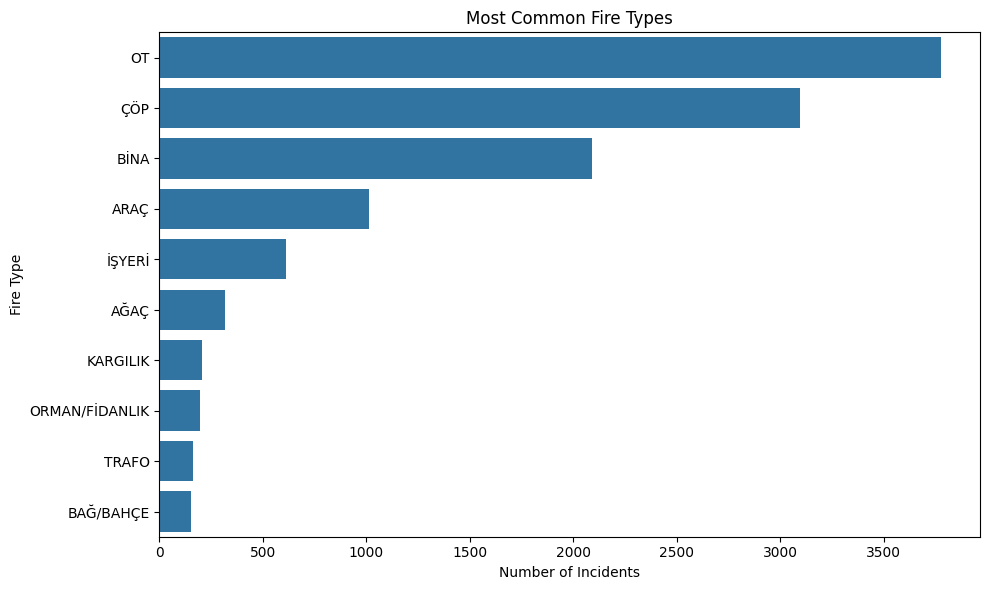

In [30]:
# MOST COMMON FIRE TYPES: Top ten fire types are listed.

plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='fire_type', order=data['fire_type'].value_counts().index[:10])
plt.title('Most Common Fire Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Fire Type')
plt.tight_layout()
plt.show()


As seen in the chart, the majority of incidents occurred in grassland (OT), garbage (ÇÖP), and building (BİNA) areas.

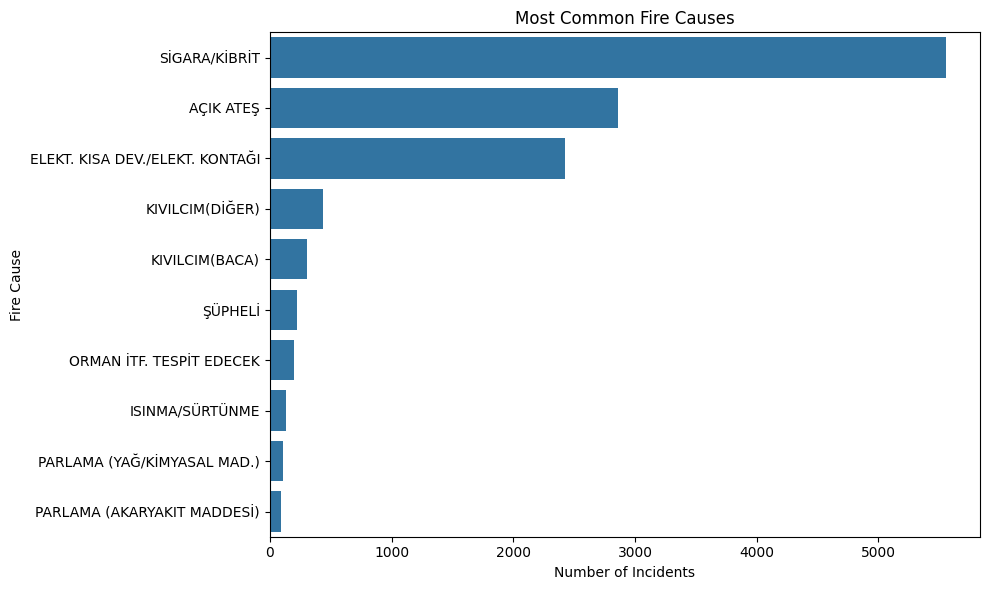

In [31]:
# MOST COMMON FIRE CAUSES: Top ten fire causes are listed.

plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='fire_cause', order=data['fire_cause'].value_counts().index[:10])
plt.title('Most Common Fire Causes')
plt.xlabel('Number of Incidents')
plt.ylabel('Fire Cause')
plt.tight_layout()
plt.show()

The leading causes include smoking materials (SİGARA/KİBRİT), open flames (AÇIK ATEŞ), and electrical failures (ELEKT. KISA DEV./ELEKT. KONTAĞI). These human-related factors highlight the importance of public awareness and safety measures. Understanding the main causes can help guide fire prevention campaigns and improve risk management strategies.

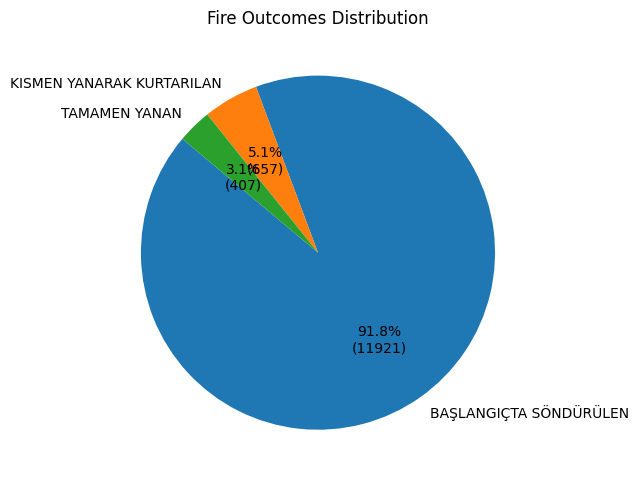

In [32]:
# THE DISTRIBUTION OF FIRE OUTCOMES:

outcome_counts = data['fire_outcome'].value_counts()

plt.figure(figsize=(6, 5))
plt.pie(
    outcome_counts,
    labels=outcome_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(outcome_counts)/100)})',
    startangle=140)
plt.title('Fire Outcomes Distribution')
plt.tight_layout()
plt.show()


The chart shows that 91.8% of fire incidents (11,922 incidents) were extinguished at an early stage (BAŞLANGIÇTA SÖNDÜRÜLEN), while 5.1% which is 657 incidents resulted in partially burnt (KISMEN YANARAK KURTARILAN) and only 3.1% which is 407 of them ended in completely burnt (TAMAMEN YANAN). This emphasizes the effectiveness of rapid response and highlights the importance of early intervention in minimizing fire damage.

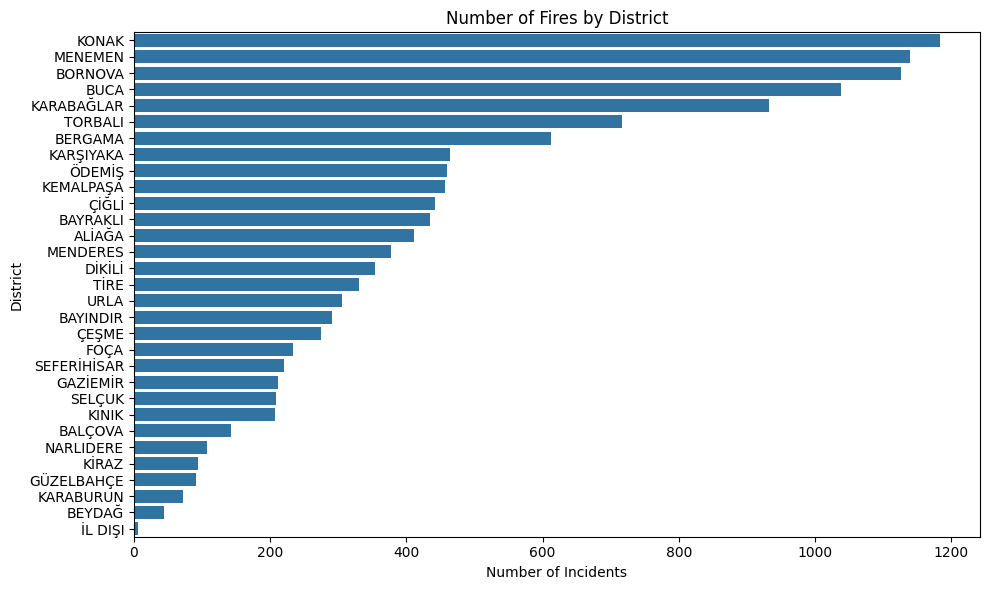

In [33]:
# NUMBER OF FIRES BY DISTRICTS: 

plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='district', order=data['district'].value_counts().index)
plt.title('Number of Fires by District')
plt.xlabel('Number of Incidents')
plt.ylabel('District')
plt.tight_layout()
plt.show()

Districts with highest numbers of fires are likely to have more crowded population or higher number of infrastructure, which may increase the risk of fire incidents.

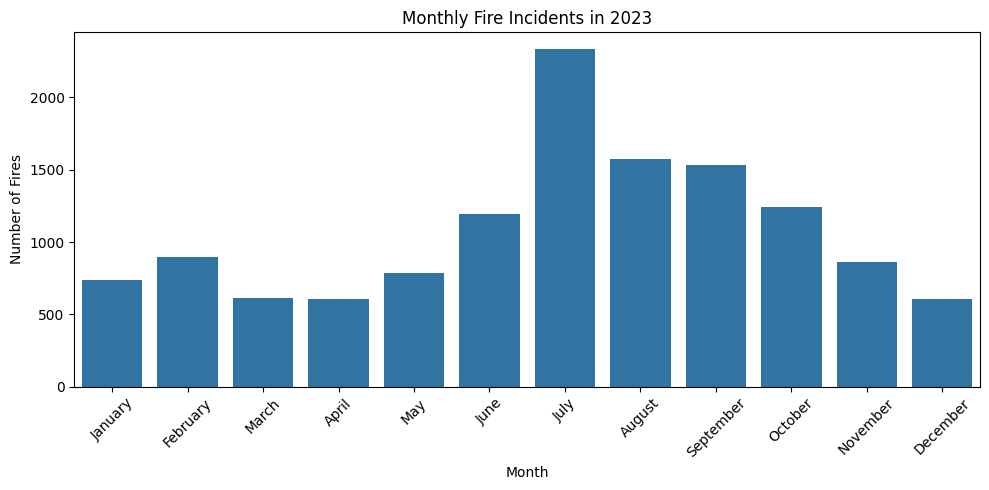

In [34]:
# Number of Fire Incidents by Months (Monthly Trend)

data['month'] = pd.to_datetime(data['date']).dt.month_name()

monthly_order = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='month', order=monthly_order)
plt.title('Monthly Fire Incidents in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here we can see the seasonal trend throughout the year. The chart shows that fires most frequently occur during the summer months, likely due to higher temperatures, dry weather, and increased outdoor activities, which can raise the risk of fire incidents.

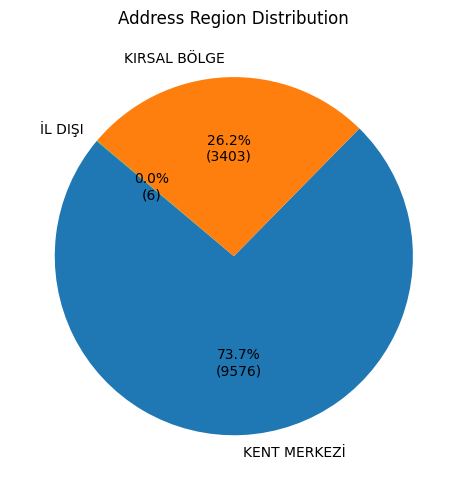

In [35]:
# The Distribution Of Incidents According To Address Region (Rural Or Urban Fires)

outcome_counts = data['address_region'].value_counts()

plt.figure(figsize=(6, 5))
plt.pie(
    outcome_counts,
    labels=outcome_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(outcome_counts)/100)})',
    startangle=140)
plt.title('Address Region Distribution')
plt.tight_layout()
plt.show()

The majority of fires occurred in urban areas (KENT MERKEZİ) with 73.7%, while for rural areas (KIRSAL BÖLGE) it is only 26.2% of the incidents. Only a negligible number of fires were recorded in İL DIŞI. 

PART 3-HYPOTHESIS TESTING

Research Question 1) Is there a significant difference in average arrival time between urban and rural fires?

Before using independent sample the t-test, we need to check three important assumptions: independence, normality, and equal variances. Independence means that each fire record should be separate and not repeated, which is true in our dataset. Normality means the data in each group should follow a normal distribution, and we tested this using the Shapiro Wilk test. Equal variances mean both groups should have similar spread, and we checked this using Levene’s test. These checks help make sure the t-test results are reliable.

In [36]:
from scipy import stats
urban_times = data[data['address_region'] == 'KENT MERKEZİ']['arrival_time_minute']
rural_times = data[data['address_region'] == 'KIRSAL BÖLGE']['arrival_time_minute']

#Let's check normality with Shapiro Wilk test
shapiro_urban = stats.shapiro(urban_times)
shapiro_rural = stats.shapiro(rural_times)

print(f"Urban normality p-value: {shapiro_urban.pvalue:.4f}")
print(f"Rural normality p-value: {shapiro_rural.pvalue:.4f}")

# Let's check Levene's test for homogeneity of variance
levene_test = stats.levene(urban_times, rural_times)
print(f"Levene's test p-value: {levene_test.pvalue:.4f}")

Urban normality p-value: 0.0000
Rural normality p-value: 0.0000
Levene's test p-value: 0.0000


c:\Users\ezgy_\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9576.
  res = hypotest_fun_out(*samples, **kwds)


The results of the Shapiro-Wilk test show that the data in both urban and rural groups are not normally distributed (p < 0.05), which means the normality assumption is violated. Additionally, Levene’s test for homogeneity of variance also produced a p-value of 0.0000, suggesting that the variances between the two groups are not equal.  However, since the sample sizes in both groups are large, we can still proceed with the t-test because of the Central Limit Theorem, which states that the sampling distribution of the mean tends to be normal as sample size increases, even if the original data is not normally distributed. To support this decision, I will also visually inspect the distributions by plotting Q-Q plots for both groups.

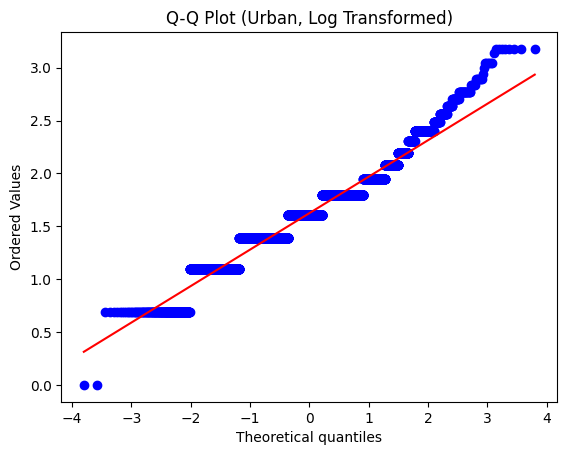

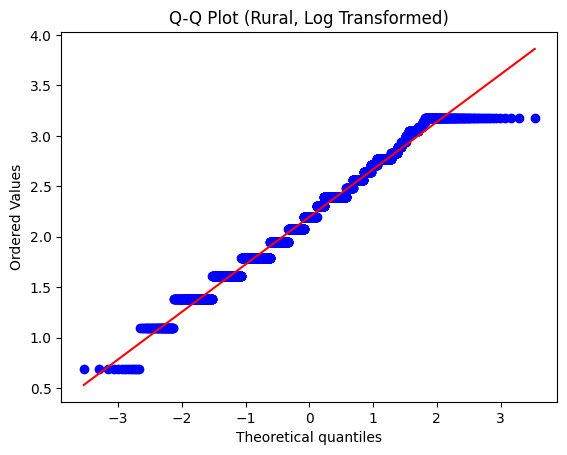

In [37]:
# I will use Log transformation because without it the QQ plot was highly skewed.
urban_log = np.log1p(urban_times) 
rural_log = np.log1p(rural_times)

# Urban QQ plot
stats.probplot(urban_log, dist="norm", plot=plt)
plt.title("Q-Q Plot (Urban, Log Transformed)")
plt.show()

# Rural QQ plot
stats.probplot(rural_log, dist="norm", plot=plt)
plt.title("Q-Q Plot (Rural, Log Transformed)")
plt.show()


Visual examination using QQ plots shows that the rural group is closer to a normal distribution, while the urban group shows more deviation from the expected normal line, especially in the upper tail. This shows that the normality assumption is still violated, even after log transformation. The results are consistent with the Shapiro Wilk test. Due to the large sample size (Central Limit Theorem), I could still applied the t test, but I also considered the Mann Whitney U test as a more raliable alternative.

So let's use Mann-Whitney U test: 

H₀ (Null Hypothesis):
There is no significant difference in average arrival time between urban and rural fire locations.
→ μ₁ = μ₂

H₁ (Alternative Hypothesis):
There is a significant difference in average arrival time between urban and rural locations.
→ μ₁ ≠ μ₂

Significance level (α) is 0.05


In [38]:
u_stat, p_value = stats.mannwhitneyu(urban_times, rural_times, alternative='two-sided')
print(f"Mann-Whitney U statistic: {u_stat}, p-value: {p_value:.4f}")

Mann-Whitney U statistic: 5396673.0, p-value: 0.0000


The p-value is 0.0000, which is less than the significance level (α = 0.05). This means we reject the null hypothesis (H₀).

Conclusion: There is a statistically significant difference in average arrival times between urban and rural fire locations. 

The higher U statistic also indicates that rural response times tend to be longer than urban ones, which we can also support with the following boxplot.

C:\Users\ezgy_\AppData\Local\Temp\ipykernel_11612\4179910334.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([urban_times, rural_times], labels=['Urban', 'Rural'])


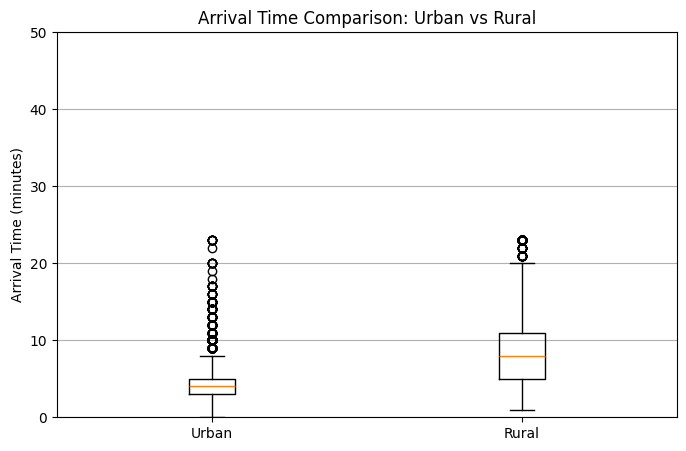

{'Mann-Whitney U Statistic': np.float64(5396673.0), 'p-value': np.float64(0.0)}

In [39]:
plt.figure(figsize=(8, 5))
plt.boxplot([urban_times, rural_times], labels=['Urban', 'Rural'])
plt.title("Arrival Time Comparison: Urban vs Rural")
plt.ylabel("Arrival Time (minutes)")
plt.ylim(0, 50)
plt.grid(axis='y')
plt.show()
{"Mann-Whitney U Statistic": u_stat, "p-value": p_value}

The boxplot clearly supports the statistical findings above. It shows that arrival times in rural areas are higher than in urban areas. The median line is clearly higher for rural fires, the overall distribution is widerand there are more extreme values. On the contrary, urban response times are more concentrated and shorter. This visual evidence are in line with the Mann-Whitney U test result and the higher U statistic. It confirms that rural fires experience longer response times on average compared to urban fires.

PART 4- MACHINE LEARNING ALGORITHM

Research Question 2) Can we predict the outcome of a fire using features like fire type, cause, arrival time, and materials used?

To answer this question, I will use Random Forest Classifier to predict the outcome of a fire. First, let's remember what I've done so far in order to prepare my data for this machine learning step:

* I filled missing values in arrival_time_minute and water_used_m3 using their median values.
* I used One-Hot Encoding for fire_outcome.
* I used Label Encoding for fire_type and fire_cause.
* I created a new feature called total_material_used by summing foam, water, and dry chemical powder.
* I handled outliers in arrival_time_minute using Winsorization to limit very high values.

Now my data is clean and ready for machine learning.

In [ ]:
# Hypermeter Tuning and Defining Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score

feature_cols = ['fire_type_encoded', 'fire_cause_encoded', 'arrival_time_minute', 'total_material_used']
target_col = 'fire_outcome_TAMAMEN YANAN'

X = data_encoded[feature_cols]
y = data_encoded[target_col]

from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2740504, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=2740504, stratify=y_train_val)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

rf = RandomForestClassifier(class_weight='balanced', random_state=2740504)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}

random_search = RandomizedSearchCV(
    rf, param_distributions=param_grid,
    n_iter=10, scoring='f1', cv=3, random_state=2740504, n_jobs=-1)
random_search.fit(X_train, y_train)

# Evaluate the best model
best_rf = random_search.best_estimator_
val_preds = best_rf.predict(X_val)
val_f1 = f1_score(y_val, val_preds)

random_search.best_params_, val_f1

Training set size: 7787
Validation set size: 2596
Test set size: 2596


({'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_depth': 10},
 0.44015444015444016)

My target variable that is fire_outcome_TAMAMEN YANAN is imbalanced. To fix this, I used class_weight='balanced' to give more importance to rare outcome that is "TAMAMEN YANAN". I split the dataset into three parts: Training, validation and test and shared the numbers above. I used stratify=y to make sure each split has the same ratio.For tuning, I used RandomizedSearchCV with 3-fold cross-validation. This method tests 10 different combinations of hyperparameters. It is faster than Grid Search and still finds good settings.
After tuning, I selected the best model using F1 score on the validation set.
F1 score is good for imbalanced data because it considers both precision and recall.

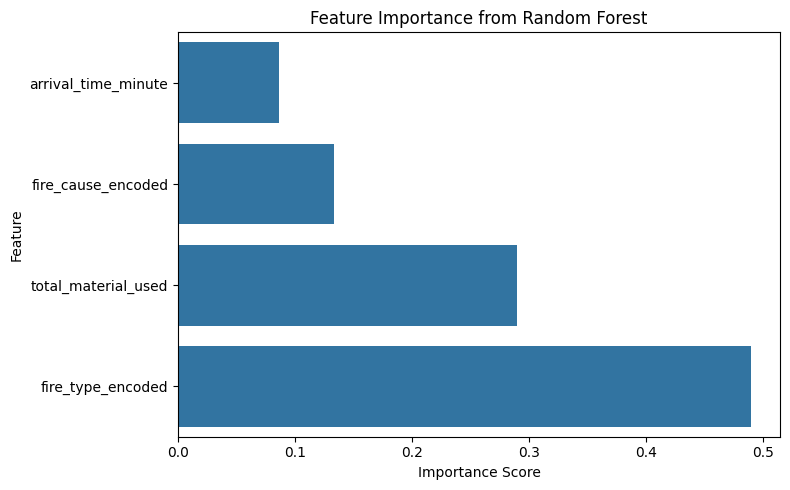

In [54]:
# Interpretability – Feature Importance Visualization
# Feature importance extraction
feature_importances = best_rf.feature_importances_
features = feature_cols

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# Plot the importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



The feature importance plot shows that fire_type_encoded is the most important feature in predicting whether a fire ends up fully burning. This means the type of fire plays a major role in the model’s decision. The second most important feature is total_material_used, which is also expected because severe fires usually require more firefighting resources. On the other hand, fire_cause_encoded and especially arrival_time_minute had less influence on the prediction. This result is interesting because it suggests that fire type matters more than how fast the team arrives. This finding can help focus on fire prevention strategies for specific fire types.

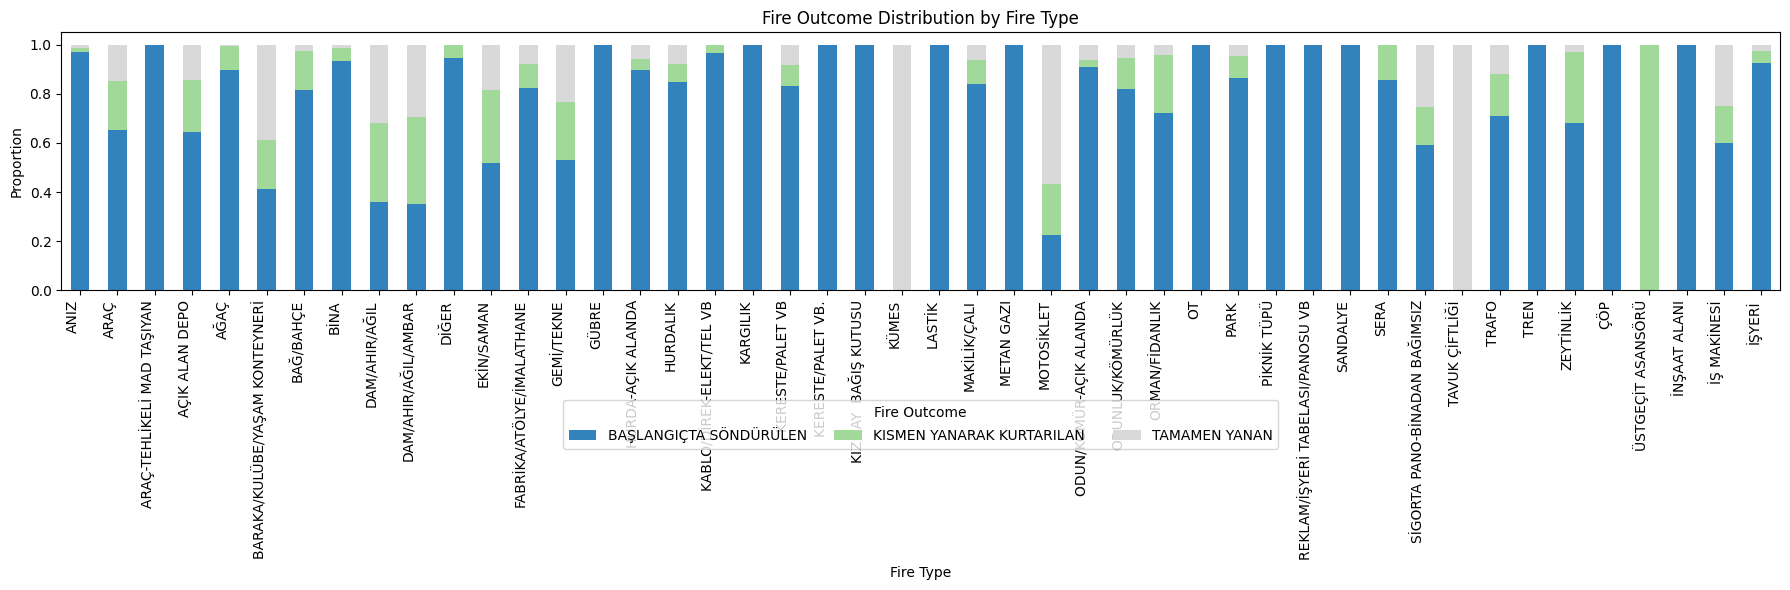

In [ ]:
# Grouping by fire_type and fire_outcome to calculate proportions

fire_outcome_distribution = (
    data.groupby('fire_type')['fire_outcome']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .sort_index())

fire_outcome_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(18, 6), 
    colormap='tab20c')

plt.title("Fire Outcome Distribution by Fire Type")
plt.ylabel("Proportion")
plt.xlabel("Fire Type")
plt.xticks(rotation=90, ha='right')
plt.legend(title='Fire Outcome', loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=3)
plt.tight_layout()
plt.show()

I wanted to further investigate and do this analysis because the model showed that fire type is the most important feature for predicting fire outcome. So, I wanted to explore this feature more deeply. This chart helps me to understand how different fire types usually end. For example, some fire types are mostly controlled early, while others often end in full burn. This information is useful for fire risk planning and better resource allocation.

In [72]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import ttest_rel

# Predict with best model (Random Forest) on test set
rf_preds = best_rf.predict(X_test)

# Create baseline model (most frequent class strategy)
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test)

# Evaluate both models
def evaluate_model(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

rf_results = evaluate_model(y_test, rf_preds, 'Random Forest')
dummy_results = evaluate_model(y_test, dummy_preds, 'Baseline (Most Frequent)')

# Combine into a DataFrame
results_df = pd.DataFrame([dummy_results, rf_results])
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Baseline (Most Frequent),0.968798,0.000000,0.000000,0.0
1,Random Forest,0.945686,0.305195,0.580247,0.4


We compared our model with a naive baseline that always predicts the most common class. The baseline had high accuracy but zero F1 score because it never predicted the minority class. Our Random Forest model had a lower accuracy but a much better F1 score, which is more important for imbalanced data. This shows that our model is more useful for detecting rare but important cases like fully burned fires.

IMPLICATIONS and DISCUSSIONS 

This study tried to answer two important questions. First, we wanted to know if there is a big difference in arrival times between urban and rural fires. Second, we wanted to see if we can predict how a fire will end by using early information like fire type, cause, arrival time, and materials used.

We were able to answer both questions with our data and models.

For the first question, our analysis showed that firefighters take longer to arrive in rural areas. This supports what other studies also found. Rural areas often have fewer fire stations and longer distances. This makes response times slower. This can be a safety risk for people living in those areas.

For the second question, we used a Random Forest model to predict if a fire will be fully burned. We used features that are available early in an incident. The model gave better results than a baseline model. It showed that fire type and total material used are strong predictors. This means we can make useful predictions with limited information. It also means fire services can prepare better and act faster.

There are also some limitations in this study. We only used data from one city and one year. We also used only four features for prediction. If we had more data and more features (like weather, building type, or region), the model might be even better.

One advantage of our study is that we used real, detailed fire records. We also used a model that works well with mixed data types. The findings can help with emergency planning and fair resource allocation.